# Practical session introducing supervised classification with SciKit-Learn

In this notebook, you will:
* learn to use a "Jupyter notebook" to perform your data analysis and machine-learning work *and keep track of every step*;
* get familiarized with scikit-learn library;
* develop a first classification algorithm.

This noteboook uses the following libraries:
* python3 
* numpy
* matplotlib 
* scikit-learn 

In order to verify if these library are properly installed on your computer, and check which versions, run the cell below by clicking on it and then on the "Play" button above this window (or use the Shift+Enter shortcut).

In [1]:
import sys
print(sys.version)

import numpy
print(numpy.__version__)

import matplotlib
print(matplotlib.__version__)

import sklearn
print(sklearn.__version__)

3.8.10 | packaged by conda-forge | (default, Sep 13 2021, 21:12:34) [MSC v.1916 64 bit (AMD64)]
1.20.3
3.4.3
0.24.2


# 1.  The Jupyter notebook 

Jupyter is a web application allowing to create and share documents named _notebooks_ (such as the present `intro-supervised-classif.ipynb` file), that can contain: 1/ explanatory text formatted in simple markdown, and equations; 2/ modifiable code that can be executed directly in the web page, with resulting output and visualization appearing directly on the page, just below the code cell.

A few information about use of Jupyter notebooks:
* A notebook is structured in editable blocks called _cells_. A cell can contain _raw text_, code, or markdown-formatted text. For more information on markdown syntax, you can read the following [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) !
* To execute a cell, just click on it to select it, and then type the Shift+Enter shortcut (or use the Play button in the menu bar).
* To create a new empty cell below the currently selected one, type the Alt+Enter shortcut (or use the "+" button on the menu bar).
* The Insert menu also allows to insert a new cell either below or above the currently selected one. 
* In case the notebook is frozen (i.e. stops responding to commands), you can restart it either by pressing the Restart button or using the Kernel --> Restart menu.

A few elements about using Jupyter notebooks containing Python code:
* A Python code cell behaves like an interactive Python shell (more precisely like ipython, on which Jupyter is based). In particular: 
  * The tabulation key performs auto-completion of the keyword you have begun to type
  * Typing a question mark after the name of an object loads and and displays interactive help for this function.
* Jupyter includes special Python commands called _magics_. For example, `%bash` allows to execute bash code as if you were in a linux terminal, `%paste` allows to paste a code block that had been copied before (from the notebook or another application) while respecting its formatting (in particular indentations), and `%matplotlib inline` allows to display matplotlib graphic visualisations _inside the notebook_ instead of an external window. A complete list of _magics_ can be found at http://ipython.readthedocs.io/en/stable/interactive/magics.html 


### Ressources 
* To know more about interactive Python shell python: http://ipython.readthedocs.io/en/stable/interactive/tutorial.html
* To know more about Jupyter : https://jupyter.org/
* Python and Python Scientifique : http://www.scipy-lectures.org/
* For a quick introduction to difference between python shell, interactive python shell, and notebooks: https://www.youtube.com/watch?v=ULzWaZQa1Dc (in French)

In [2]:
# Importation of classic computation and visualization packages 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Data handling

This practical aims at familiarizing you with scikit-learn, and learn to use models contained in this library.

We will use a simplified version (called _digits_) of the classic MNIST dataset. Each exampl of this dataset is a handwritten digit in low resolution (`8x8`images).
Let's import it.

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


The `data` attribute of an sklearn dataset systematically has the following dimensions: `(n_samples, n_features)`.
Here, one line is therefore a vector corresponding to a "flattened" image. This image can be visualized after restructuring the vector with the `.reshape` method of a numpy table.

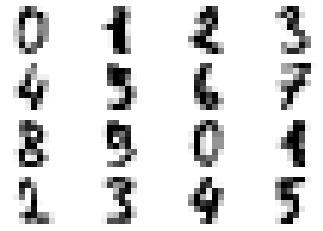

In [4]:
# Plot of the 16 first examples of the dataset.
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.imshow(digits.data[i,:].reshape((8,8)), cmap='Greys')
    ax.set_axis_off()

`data` and `target` are 2 attributes of this dataset.
It is possible to list the attributes and methods of class using `dir(object)`.

**Question:**

> Was there a simpler way to plot the example images?

**Answer**:


The goal here will be to learn to classify these images according to the digit they represent (therefore 10 classes).

For evaluating the learnt classifier, it is **essential to use a TEST dataset INDEPENDANT from the one used for training**.
Randomly separating a dataset into a `train` part and a `test` part can be done using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, 
                                                                    test_size=0.3, random_state=84)

Text(0.5, 0, 'train labels')

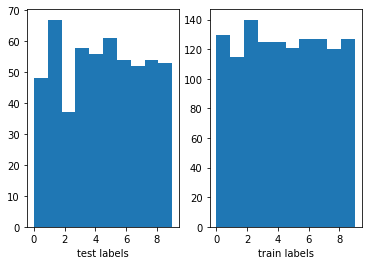

In [6]:
plt.subplot(1, 2, 1)
plt.hist(label_test)
plt.xlabel('test labels')
plt.subplot(1, 2, 2)
plt.hist(label_train)
plt.xlabel('train labels')

If the splitting is done totally randomly and the dataset is not large enough, this can produce uneven label repartition inside `test` and `train`. 
This can affect the performances of learnt models. For avoiding this, it is necessary to split tha dataset in a way that ensures in `train` and `test` the same proportions of labels as in the original full dataset: this is called _stratification_.

In [7]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target, 
                                                                    test_size=0.3, random_state=84, stratify=digits.target)

Text(0.5, 0, 'train labels')

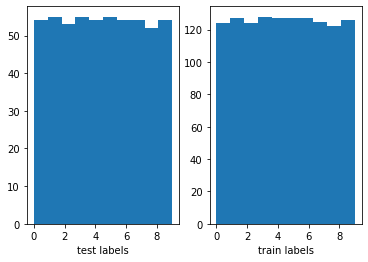

In [8]:
plt.subplot(1, 2, 1)
plt.hist(label_test)
plt.xlabel('test labels')
plt.subplot(1, 2, 2)
plt.hist(label_train)
plt.xlabel('train labels')

# 3. Training of a classifier

We can now train a model on the training set (`data_train`, `label_train`), and then evaluate it on the test dataset (`data_test`, `label_test`).

In sklearn, all models are implemented as subclasses of `BaseEstimator`.
They are all used in the same manner, in the 3 following steps:

* Instantiate the model `model(**kwargs)`
* Learn the model on a training set with the `fit` method: `model.fit(X=data, y=ground_truth)`.
* Use and evaluate the trained model with `predict` and `score` methods. For example: `model.predict(X=data_test)`

Reminder: `dir(object)` can be used to list the available methods and attributes, and `help(object.method)` displays the documentation of the corresponding method.

### Assignment 1: Instantiate, train, and test a 5-Nearest-Neighbors classifier on the digits dataset

In [9]:
from sklearn.neighbors import KNeighborsClassifier

## Instantiate, train, and test a 5-nearest-neighbors (5-NN) classifier.



Now, look in more details at some examples of successes and failures of the obtained 5-NN classifier 

In [10]:
np.random.seed(84)
## Instantiate `preds` with the predictions of the 5-NN classifier on the test set
preds = 

success = np.array(preds) == np.array(label_test)   

# Some example of correct predictions:
data_s, pred_s, label_s =data_test[success,:], preds[success], label_test[success]
sample = np.random.choice(len(pred_s), size=16) # Echantillon aléatoire de 16 succès
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    pred, ground_truth = pred_s[sample][i], label_s[sample][i]
    ax.imshow(data_s[sample,:][i,:].reshape((8,8)), cmap='Greys')
    ax.set_title('Pred: {}, Label: {}'.format(pred, ground_truth), color='b')
    ax.set_axis_off()

# Some example of FALSE predictions:
data_f, pred_f, label_f =data_test[~success,:], preds[~success], label_test[~success]
sample = np.random.choice(len(pred_f),size=16)
plt.figure(figsize=(7, 7))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    pred, ground_truth = pred_f[sample][i], label_f[sample][i]
    ax.imshow(data_f[sample,:][i,:].reshape((8,8)), cmap='Greys')
    ax.set_title('Pred: {}, Label: {}'.format(pred, ground_truth), color='r')
    ax.set_axis_off()

SyntaxError: invalid syntax (Temp/ipykernel_13764/322366827.py, line 3)

### Assignment 2: Train and evaluate a regularized logistic regression

It is possible to create to create _execution pipelines_ using `sklearn.pipeline.Pipeline`.
As any other model, a _pipeline_ has `fit`, `predict`, (etc...), methods.

Now let's implement a regularized logistic regression, using regularization parameter $\frac{1}{C} = \frac{1}{2}$.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

# Train and test the regularized logistic regression (preceded by a normalization of input data):



# 4. Evaluation of a classifier

All sklearn classifiers have a `score` method, but it computes only the **average** `accuracy` on a dataset. This is not sufficiently detailed, as it could hide a quasi-perfect accuracy on some classes combined with very poor accuracy on other classes. 

Many other metrics available for evaluation of classifiers, as well as for other tasks such as regression or clustering.
In order to quantitatively evaluate the detailed performances of a model, the [`metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) module of sklearn can be used.
It contains several useful pre-implemented metrics: [`accuracy`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score), [`auc_roc`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).




## Metrics

In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_true=label_test, y_pred=preds)
f1_weighted = metrics.f1_score(label_test, preds, average='weighted')
print('Accuracy : {}, f1 : {}'.format(acc, f1_weighted))

The classification report provides a synthetic view of the performances of a model.

In [ ]:
report = metrics.classification_report(y_true=label_test, y_pred=preds)
print(report)

## Il est possible de générer un dictionnaire des performances :
## report_dict = metrics.classification_report(y_true=label_test, y_pred=preds, output_dict=True)
## On accède alors aux performances concernant le label 0 par report_dict['0'].

## Confusion matrix

Prediction performances of a classifier can be visualized with a _confusion matrix_.

In [ ]:
import seaborn as sns
cm = metrics.confusion_matrix(y_true=label_test, y_pred=preds)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

### Assignment 3: Plot the confusion matrix of the regularized logistic regression

In [ ]:
# Plot the confusion matrix of the regularized logistic regression




# 5. Visualization of predictions

Visualizing predictions in input space is difficult for input dimension > 2.
One possible workaround is to use reduction dimension such as PCA, either directly on input space before training, or only in the visualization step (to avoid loosing information before training).
Below, we illustrate the first case: we replace the input images (8x8 pixels) by the first 2 principal componants of the dataset. We then train a k-NN classifier on this reduced-dimension inputs, and can therefore easily plot predictions for any point in this reduced 2D input space:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
import matplotlib.patches as mpatches

# We compute the first 2 PCA componants of the original dataset, and then project each example on this 2D space
pca = PCA(n_components=2, whiten=True)
X = pca.fit_transform(data_train)

# We then train a 1-NN classifier on the projected dataset
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X=X, y=label_train)

## For visualizing the predictions of the 1-NN classifier, 
## we compute predictions on a rather dense set of points in the 2D space,
## and color these points depending on the predicted class

h = .02  # Defines the grid resolution
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap = plt.cm.get_cmap('magma', 10)
Z = knnc.predict(np.c_[xx.ravel(), yy.ravel()]) # Prédiction d'un ensemble de points du plan des composantes principales.
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
im=plt.pcolormesh(xx, yy, Z, cmap='magma',alpha=.8)
plt.legend([mpatches.Patch(color=cmap(l)) for l in range(10)], [str(l) for l in range(10)])

# On affiche un échantillon des points du jeu d'entrainement
sample = np.random.choice(X.shape[0], size=250)
plt.scatter(X[sample, 0], X[sample, 1], c=label_train[sample], cmap='magma', edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

We can now also visualize the effect of the `n_neighbors` hyper-parameter on predictions of the k-NN classifier obtained:

In [ ]:
plt.figure(figsize=(15,15))

# On va afficher les prédictions du plan des composantes principales en fonction de n_neighbors.
for o,k in enumerate([1, 5, 20, 50], 1):
    knnc = KNeighborsClassifier(n_neighbors=k)
    knnc.fit(X=X, y=label_train)
    Z = knnc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(2, 2, o)
    ax.pcolormesh(xx, yy, Z, cmap='magma',alpha=.8, shading='auto')
    ax.set_title('k = {}'.format(k))
    ax.set_axis_off()

**Question:**

> What is the hypothesis class of the 1-Nearest-Neighbor?

**Answer:**

### Assignment 4: Visualize the impact of the $C$ regularization hyper-parameter on predictions obtained with regularized logistic regression .

In [ ]:
plt.figure(figsize=(15,15))

# Train the regularized logistic regression on the 2D-PCA input space, for several values of C
#  and plot the corresponding predictions 


**Question:**
> What do you observe? 

**Answer:**

# 6. Model selection

For all types of Machine-Learning models, there is nearly always one or several hyper-parameters that can significantly impact the performance of the trained model. Just like `n_neighbors` for the k-Nearest-Neighbors model, or the `C` hyper-parameter for regularized logistic regression.

It is therefore essential not only to visually inspect the impact as above, but to actually find the BEST VALUES for these crucial hyper-parameters. This can be done for instance using a `grid search`: brute-force test of a list (or `grid` if there are several hyper-parameters) of values. The ultimate goal is to maximize the generalization performance, but the selection of the best value should NOT be done directly on the test set, in order to avoid overfitting of hyper-parameter values. The model selection therefore has to be done either on a 3rd dataset dedicated to validation, or by using `cross-validation`:

![](crossval.001.jpeg)

In practice in sklearn, model selection using cross-validation is typically done using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
`GridSearchCV` works as all estimators of sklearn: it has first to be instantiated, and then it is run by using its `fit` method.

The main parameters of GridSearchCV are:

* `estimator` : the classification model used
* `param_grid` : dictionnary of the hyper-parameter values to be tested. The keys of this dictionnary are of type `str`, and correspond to the name of the parameter to be used for instatiating the `estimator`
* `scoring`: defines which metric is used to select the best values for hyper-parameters.
* `cv`: define sthe number of folds for the cross-validation

Finding good values for hyper-parameters is a kind of learning (in the sense of tuning a parameter for optimizing some criteria). For this reason, model selection has to be performed on a VALIDATION set different from the final TEST set which should be used only for estimating future generalization performance of the final model. In case validation is done by cross-validation rather than by a separate validation set, _the cross-validation must therfore be performed **on the `data_train`**_.

Once the `GridSearchCV` is fitted, its results can be accessed through its `.cv_results_`attribute. And its methods `score` and `predict` are respctively evaluating and using the best model found.

### Assignment 5: Find the best value for the `n_neighbors` hyper-parameter of k-NN model on digits dataset

In [ ]:
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV, find the best value of hyper-parameter n_neighbors for k-NearestNeighbors applied to digits
##   


In [ ]:
## Display or plot in some way the influence of n_neighbors hyper-parameter on the k-NN model performance 


### Assignment 6: Find the best value for the `C` hyper-parameter of regularized logistic regression on digits dataset

In [ ]:
from sklearn.model_selection import GridSearchCV
stsc = StandardScaler()
data_train = stsc.fit_transform(data_train)

## Find the best value for hyper-parameter C of regularized logistic regression


In [ ]:
## Display or plot in some way the influence on performances of C hyper-parameter for regularized logistic regression applied to digits



**Questions:** 
> Explain the respective effects of these 2 hyper-parameters on the training outcome

**Answer**:

### Assignment 7: Determine which model should better be used on the digits dataset, between k-NN and regularized logistic regression 

**Questions:**

> How should we do to compare these 2 model types and select one? \
> How should we evaluate the final result of this best model?

**Answer:**

In [ ]:
# Insert code below for selection and final evaluation